In [4]:
import sklearn.decomposition as sk_decomp
from sklearn import linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score as cvs
import os

In [5]:
os.chdir("C:\\Users\\dwarf\\Dataproject")

In [6]:
meth_even = pd.read_csv("raw_data\combined_data\combined_2mers_meth_even.tsv", sep="\t")
meth_odd = pd.read_csv("raw_data\combined_data\combined_2mers_meth_odd.tsv", sep="\t")
unmeth_even = pd.read_csv("raw_data\combined_data\combined_2mers_unmeth_even.tsv", sep="\t")
unmeth_odd = pd.read_csv("raw_data\combined_data\combined_2mers_unmeth_odd.tsv", sep="\t")
#unmeth = pd.read_csv("processed_data\combined_data\split_with_background\combined_2mers_unmeth.tsv", sep="\t")

In [7]:
#meth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_even_with_background.tsv", sep="\t")
#meth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_odd_with_background.tsv", sep="\t")
#unmeth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_even_with_background.tsv", sep="\t")
#unmeth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_odd_with_background.tsv", sep="\t")
#unmeth = pd.read_csv("processed_data\combined_data\split_with_background\combined_2mers_unmeth.tsv", sep="\t")

In [8]:
meth_even = meth_even.loc[meth_even["cancer"]=="Healthy"]
meth_odd = meth_odd.loc[meth_odd["cancer"]=="Healthy"]
unmeth_even = unmeth_even.loc[unmeth_even["cancer"]=="Healthy"]
unmeth_odd = unmeth_odd.loc[unmeth_odd["cancer"]=="Healthy"]

#meth = meth.iloc[: , :-1]
#unmeth = unmeth.iloc[: , :-1]

In [9]:
meth_even=meth_even.drop(306)
meth_odd=meth_odd.drop(306)
unmeth_even=unmeth_even.drop(306)
unmeth_odd=unmeth_odd.drop(306)

In [10]:
frames = [meth_even,meth_odd,unmeth_even,unmeth_odd]
combo = pd.concat(frames)
combo = combo.iloc[: , :-1]

In [11]:
pca = sk_decomp.PCA(n_components=2)
combo = pca.fit_transform(combo)

In [12]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [13]:
x = column(combo,1)
y = column(combo,0)

In [14]:
nrow = 243

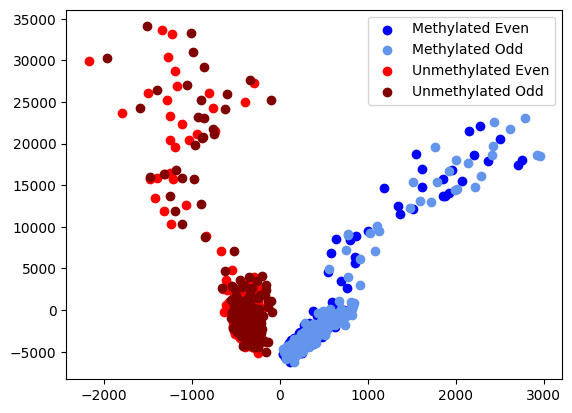

In [16]:
plt.scatter(x[nrow*0:nrow*1],y[nrow*0:nrow*1],color = "blue", label="Methylated Even")
plt.scatter(x[nrow*1:nrow*2],y[nrow*1:nrow*2], color = "cornflowerblue", label="Methylated Odd")
plt.scatter(x[nrow*2:nrow*3],y[nrow*2:nrow*3], color ="red", label="Unmethylated Even")
plt.scatter(x[nrow*3:nrow*4],y[nrow*3:nrow*4], color = "maroon", label="Unmethylated Odd")
plt.legend()
plt.savefig("All_healthy_outlier_removed_raw" + ".png")